<a href="https://colab.research.google.com/github/palakgupta1214/Open-Dynamics-of-Bitcoin-/blob/main/%20Impact%20by%20Bitcoin%20forums%20sentiments%20vs%20Twitter%20Sentiments%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing pandas library
import pandas as pd
file_path = '/content/drive/MyDrive/processed_bitcoinforum.csv'
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
# Displaying the DataFrame
print(df)

        Post_ID              User     Type  \
0             1        adhitthana     Post   
1             1  jonald_fyookball  Comment   
2             3    CryptoMark2585     Post   
3             3           tuskacz  Comment   
4             3     Alphabay.Shop  Comment   
...         ...               ...      ...   
387159   387141            Kprawn  Comment   
387160   387161          tbch2325     Post   
387161   387161        gentlemand  Comment   
387162   387161          tbch2325  Comment   
387163   387161        gentlemand  Comment   

                                      Title  \
0       bitcoin fit within capitalism style   
1       bitcoin fit within capitalism style   
2                           bitcoin illegal   
3                           bitcoin illegal   
4                           bitcoin illegal   
...                                     ...   
387159          bitcoin tycoon xboxone game   
387160            lightning network segwitx   
387161            lightn

In [ ]:
df.head(6)

,Post_ID,User,Type,Title,Content,Timestamp,Parent_Post_ID
0,1,adhitthana,Post,bitcoin fit within capitalism style,buy little ago digital bitcoin thankfully sell...,17/09/14,NaN
1,1,jonald_fyookball,Comment,bitcoin fit within capitalism style,invest panie risky invest bitcoin need bitcoin...,17/09/14,1.0
2,3,CryptoMark2585,Post,bitcoin illegal,know bitcoin legalbut country call bit coin le...,18/01/18,NaN
3,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,18/01/18,3.0
4,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,18/01/18,3.0
5,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,18/01/18,3.0


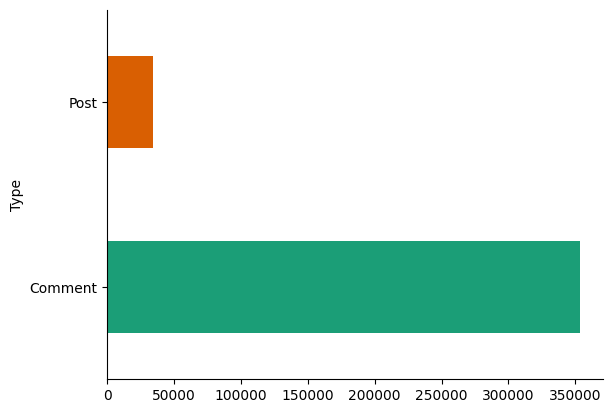

In [ ]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stop_words = {'mean', 'need', 'know', 'make', 'look', 'use', 'keep'}
stop_words.update(custom_stop_words)

# Convert the 'Content' column to string and then remove stopwords
df['Content'] = df['Content'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
print(df)

        Post_ID              User     Type  \
0             1        adhitthana     Post   
1             1  jonald_fyookball  Comment   
2             3    CryptoMark2585     Post   
3             3           tuskacz  Comment   
4             3     Alphabay.Shop  Comment   
...         ...               ...      ...   
387159   387141            Kprawn  Comment   
387160   387161          tbch2325     Post   
387161   387161        gentlemand  Comment   
387162   387161          tbch2325  Comment   
387163   387161        gentlemand  Comment   

                                      Title  \
0       bitcoin fit within capitalism style   
1       bitcoin fit within capitalism style   
2                           bitcoin illegal   
3                           bitcoin illegal   
4                           bitcoin illegal   
...                                     ...   
387159          bitcoin tycoon xboxone game   
387160            lightning network segwitx   
387161            lightn

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment score for each text
def calculate_sentiment_score(text):
    if isinstance(text, str):
        # Calculate the sentiment score
        sentiment_score = sid.polarity_scores(text)['compound']
        return sentiment_score
    else:
        return None

# Apply sentiment analysis to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment_score)

# Print the DataFrame to verify that sentiment scores have been added
print(df[['Content', 'Sentiment']])

                                                  Content  Sentiment
0       buy little ago digital bitcoin thankfully sell...     0.8442
1       invest panie risky invest bitcoin bitcoin succ...     0.3400
2       bitcoin legalbut country call bit coin legalwh...     0.0000
3       bitcoin threat fiat currency politician lobby ...    -0.5106
4       countryes goubern bitcoin technology problem b...    -0.4019
...                                                   ...        ...
387159  play game call batmud base finland currency mu...     0.9493
387160  wonder could clear whether lightning network u...     0.3400
387161  segwitx two part segwit soft fork first alread...    -0.5698
387162             okay thank lightning network hard fork     0.4588
387163  tbch pmokay thank lightning network hard fork ...     0.5574

[387164 rows x 2 columns]


In [ ]:
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0.1:
        return 'Positive'
    elif sentiment_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

In [ ]:
print(df[['Content', 'Sentiment', 'Sentiment_Category']])

                                                  Content  Sentiment  \
0       buy little ago digital bitcoin thankfully sell...     0.8442   
1       invest panie risky invest bitcoin bitcoin succ...     0.3400   
2       bitcoin legalbut country call bit coin legalwh...     0.0000   
3       bitcoin threat fiat currency politician lobby ...    -0.5106   
4       countryes goubern bitcoin technology problem b...    -0.4019   
...                                                   ...        ...   
387159  play game call batmud base finland currency mu...     0.9493   
387160  wonder could clear whether lightning network u...     0.3400   
387161  segwitx two part segwit soft fork first alread...    -0.5698   
387162             okay thank lightning network hard fork     0.4588   
387163  tbch pmokay thank lightning network hard fork ...     0.5574   

       Sentiment_Category  
0                Positive  
1                Positive  
2                 Neutral  
3                Negati

In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 351796
Number of columns: 9


In [ ]:
sentiment_distribution = df['Sentiment_Category'].value_counts()
print(sentiment_distribution)

Sentiment_Category
Positive    197446
Negative     95896
Neutral      58454
Name: count, dtype: int64


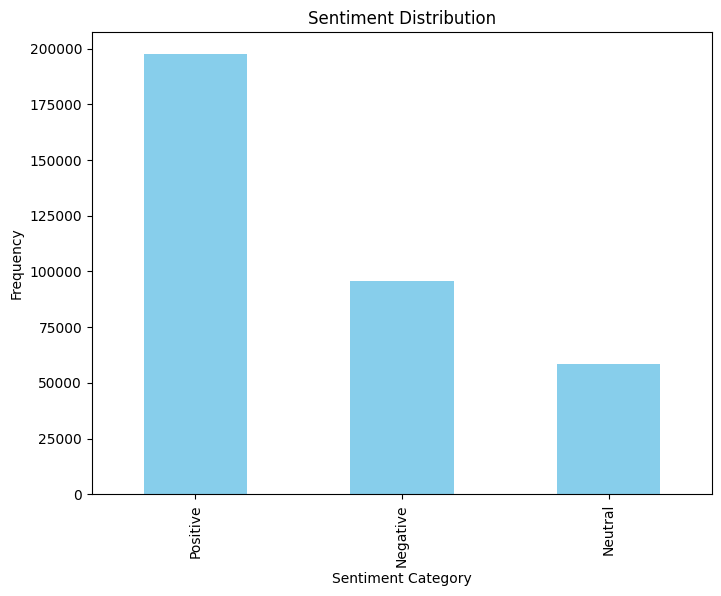

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

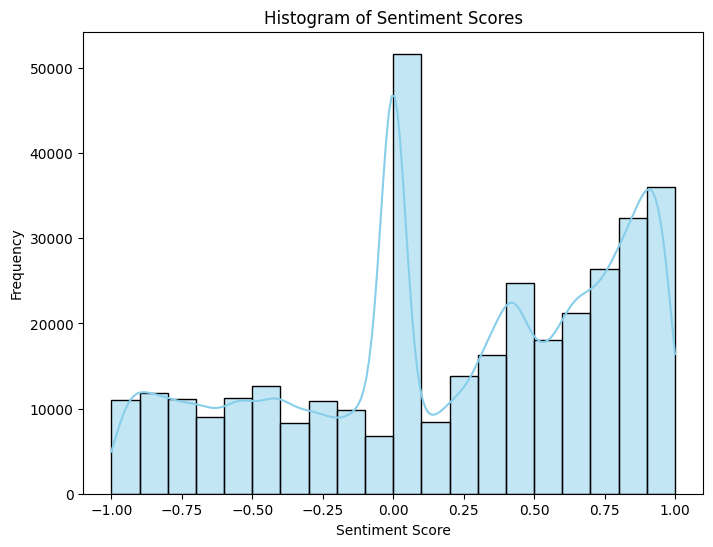

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-44-6b4e5a4b160d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


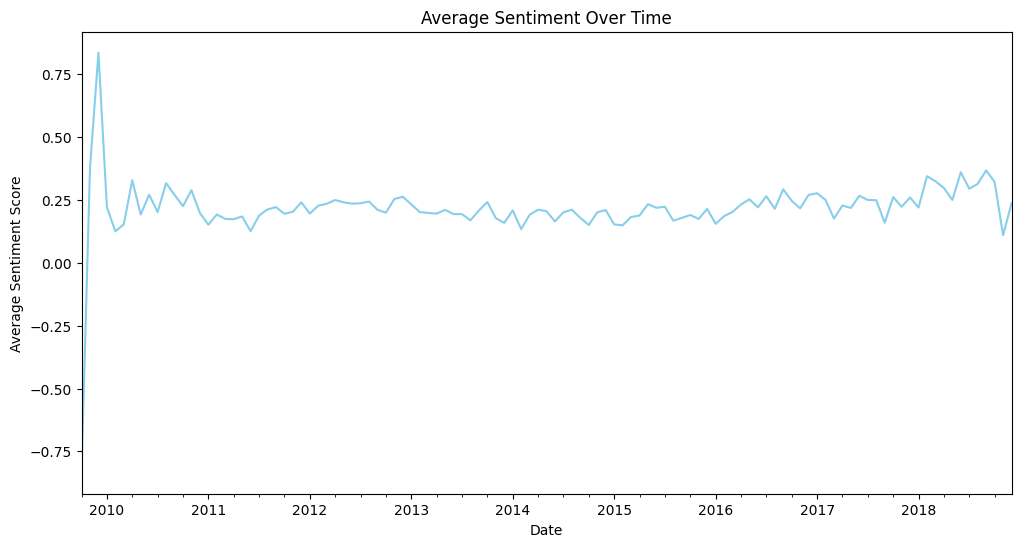

In [ ]:
plt.figure(figsize=(12, 6))
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df['Sentiment'].resample('M').mean().plot(color='skyblue')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

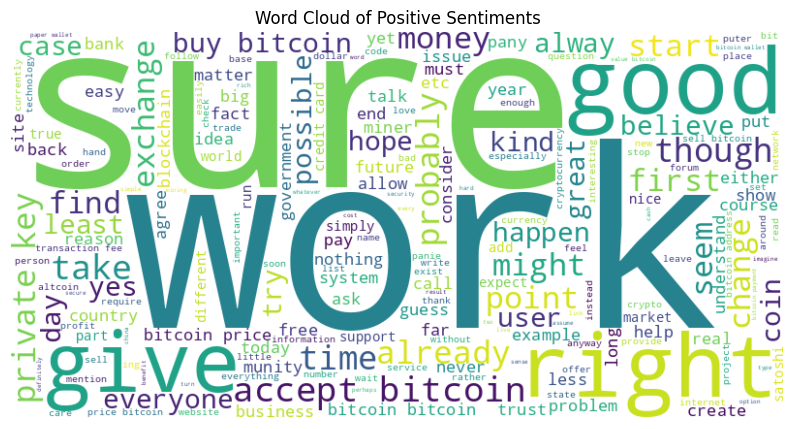

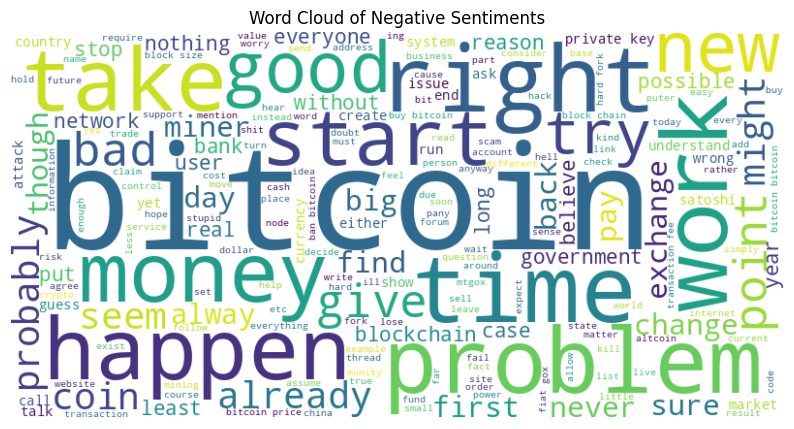

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiments
positive_text = ' '.join(df[df['Sentiment'] > 0]['Content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments')
plt.axis('off')
plt.show()

# Generate word cloud for negative sentiments
negative_text = ' '.join(df[df['Sentiment'] < 0]['Content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments')
plt.axis('off')
plt.show()

# Interpretation:     

Topic 1: Bitcoin and Currency Regulation: This topic seems to involve discussions about Bitcoin as a form of currency, its acceptance, regulations by governments and banks, and its impact on the world economy.

Topic 2: Tech Giants and Bitcoin: This topic appears to include mentions of tech companies like Bing, Google, and possibly Bitcoin Cash, along with discussions about their involvement with Bitcoin, whether it's related to search trends, investments, or new developments.

Topic 3: Bitcoin Transactions and Network Fees: This topic relates to Bitcoin transactions, including discussions about transaction fees, block confirmation times, miners' roles, and the overall functioning of the Bitcoin network.

Topic 4: Bitcoin Wallets and Security: This topic involves discussions about Bitcoin wallets, including different types of wallets such as paper wallets, online wallets, and the importance of private keys in securing Bitcoin holdings.

Topic 5: Bitcoin Price and Market Trends: This topic revolves around discussions about the price of Bitcoin, including buying and selling decisions, market movements, and factors influencing Bitcoin's price fluctuations such as supply and demand dynamics.





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Define the number of topics
num_topics = 5

# Create a TfidfVectorizer object to convert text documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['Content'])

# Fit NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X)

# Function to display top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Number of top words to display for each topic
n_top_words = 10

# Display the topics
print("Topics found using NMF:")
print()
display_topics(nmf_model, vectorizer.get_feature_names_out(), n_top_words)

Topics found using NMF:

Topic 1:
bitcoin currency money good accept bank country government world fiat
Topic 2:
nan bing bitcoincash king google live sell long explorer new
Topic 3:
transaction fee block miner pay high network send confirm time
Topic 4:
wallet address key private coin send paper safe store online
Topic 5:
price buy sell coin market time high increase rise bitcoin


In [ ]:
df.head()

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category
Timestamp,,,,,,,,
2014-09-17,1,jonald_fyookball,Comment,bitcoin fit within capitalism style,invest panie risky invest bitcoin bitcoin succ...,1.0,0.3400,Positive
2018-01-18,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative
2018-01-18,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative
2018-01-18,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative
2018-01-18,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive


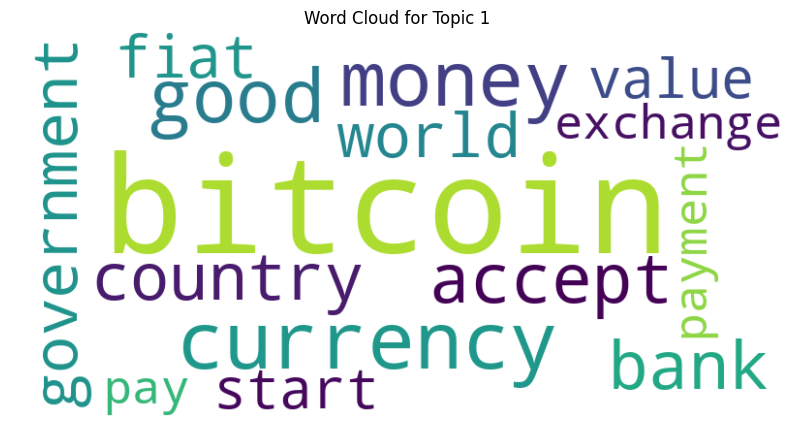

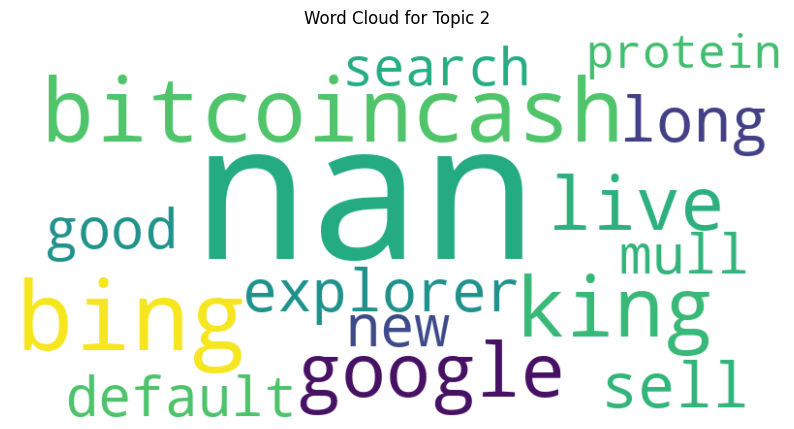

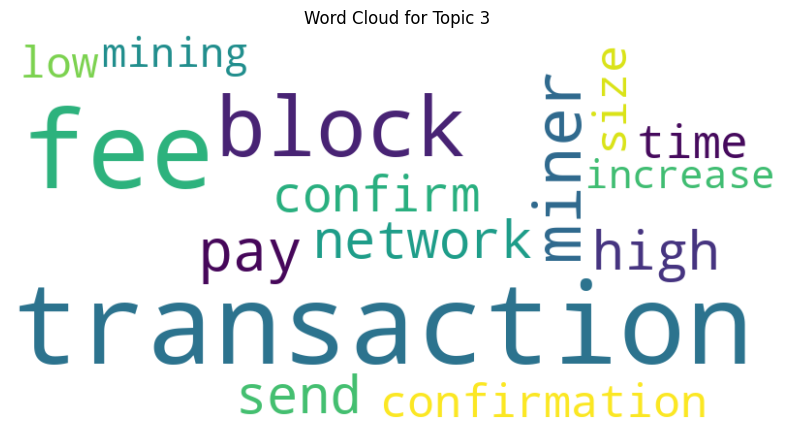

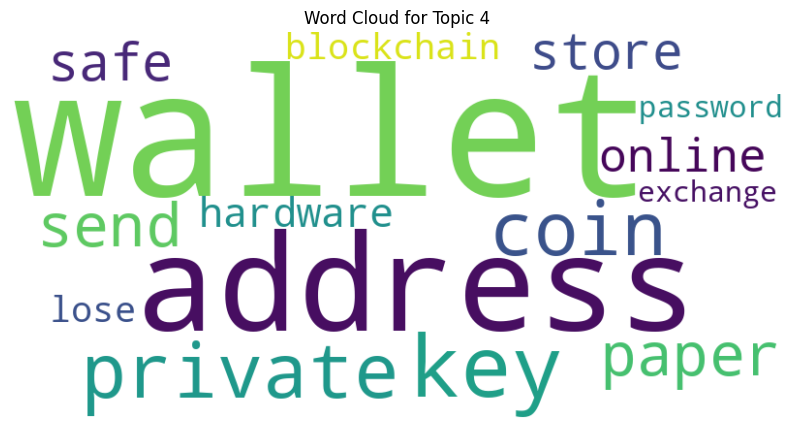

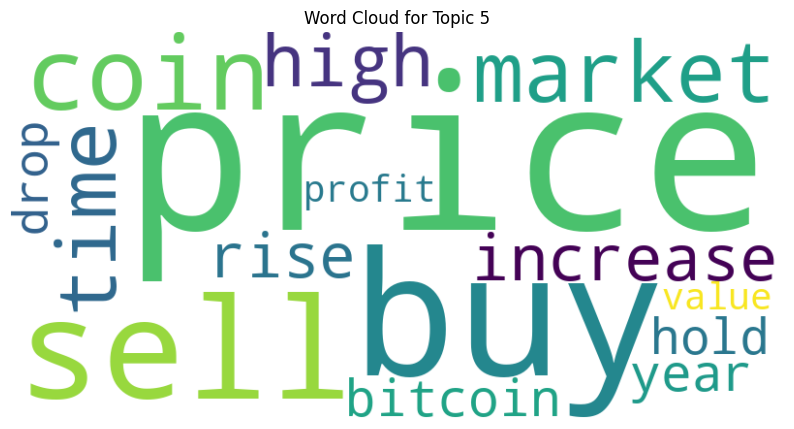

In [ ]:
# Function to plot word clouds for each topic
def plot_word_clouds(components, n_top_words):
    for topic_idx, topic in enumerate(components):
        word_freq = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Topic {topic_idx + 1}')
        plt.axis('off')
        plt.show()

# Plot word clouds for each topic
plot_word_clouds(nmf_model.components_, n_top_words=15)

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


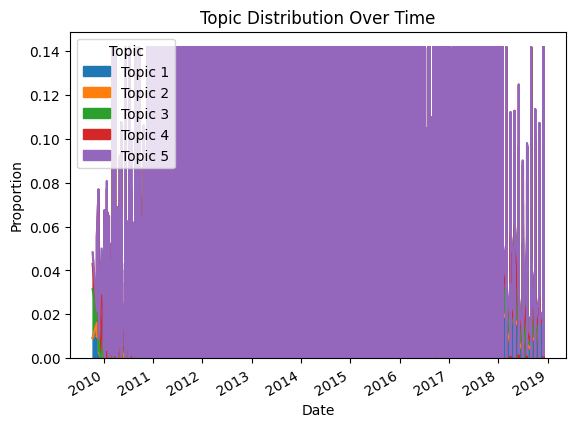

In [ ]:
# Topic Distribution Over Time
topic_distribution_over_time = pd.DataFrame(nmf_model.transform(X), columns=[f'Topic {i}' for i in range(1, num_topics + 1)])
topic_distribution_over_time.index = df.index

# Plot the topic distribution over time
plt.figure(figsize=(12, 6))
topic_distribution_over_time.plot(kind='area', stacked=True)
plt.title('Topic Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Topic')
plt.show()

Getting Bitcoin Prices

In [ ]:
btc_df = pd.read_csv("/content/drive/MyDrive/price_bitcoin.tsv", sep='\t')

btc_df['Timestamp'] = pd.to_datetime(btc_df['date'])

# Merge the Bitcoin values with your DataFrame based on the "Timestamp" column
df = pd.merge(df, btc_df[['Timestamp', 'close']], left_index=True, right_on='Timestamp', how='left')

# Rename the 'Close' column from the Bitcoin values to 'btc_price'
df.rename(columns={'close': 'btc_price'}, inplace=True)

# Print the updated DataFrame
print(df.head())

        Post_ID              User     Type  \
1261.0        1  jonald_fyookball  Comment   
42.0          3           tuskacz  Comment   
42.0          3     Alphabay.Shop  Comment   
42.0          3        usahaali03  Comment   
42.0          3          crypto90  Comment   

                                      Title  \
1261.0  bitcoin fit within capitalism style   
42.0                        bitcoin illegal   
42.0                        bitcoin illegal   
42.0                        bitcoin illegal   
42.0                        bitcoin illegal   

                                                  Content  Parent_Post_ID  \
1261.0  invest panie risky invest bitcoin bitcoin succ...             1.0   
42.0    bitcoin threat fiat currency politician lobby ...             3.0   
42.0    countryes goubern bitcoin technology problem b...             3.0   
42.0    forbid bitcoin operate ban bitcoin medium exch...             3.0   
42.0    moment bitcoin totally legal otherwise pany ac.

In [ ]:
df.head(30)

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category,Timestamp,btc_price
1261.0,1,jonald_fyookball,Comment,bitcoin fit within capitalism style,invest panie risky invest bitcoin bitcoin succ...,1.0,0.3400,Positive,2014-09-17,457.33
42.0,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative,2018-01-18,11474.90
42.0,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative,2018-01-18,11474.90
42.0,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative,2018-01-18,11474.90
42.0,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive,2018-01-18,11474.90
42.0,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi chi...,3.0,-0.0258,Neutral,2018-01-18,11474.90
42.0,3,crustycrab666,Comment,bitcoin illegal,country legal japanese illegal russia depend c...,3.0,-0.9325,Negative,2018-01-18,11474.90
42.0,3,ralle14,Comment,bitcoin illegal,certain country ban bitcoin criminal activity ...,3.0,-0.6727,Negative,2018-01-18,11474.90
42.0,3,3gon,Comment,bitcoin illegal,cryptomark pma bitcoin legalbut country call b...,3.0,-0.2960,Negative,2018-01-18,11474.90
42.0,3,Rukawa2k,Comment,bitcoin illegal,bitcoin new innovation yet fully implement leg...,3.0,0.8874,Positive,2018-01-18,11474.90


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(6)

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category,Timestamp,btc_price
0,1,jonald_fyookball,Comment,bitcoin fit within capitalism style,invest panie risky invest bitcoin bitcoin succ...,1.0,0.3400,Positive,2014-09-17,457.33
1,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative,2018-01-18,11474.90
2,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative,2018-01-18,11474.90
3,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative,2018-01-18,11474.90
4,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive,2018-01-18,11474.90
5,3,pitiflin,Comment,bitcoin illegal,sherlock everything approve government fyi chi...,3.0,-0.0258,Neutral,2018-01-18,11474.90


In [ ]:
nan_rows = df[df['btc_price'].isna()]
print("Rows with NaN btc_price:")
print(nan_rows.index)

Rows with NaN btc_price:
Index([    89,     90,     91,     92,     93,     94,     95,     96,    108,
          109,
       ...
       351699, 351700, 351701, 351702, 351703, 351704, 351705, 351706, 351707,
       351743],
      dtype='int64', length=89459)


In [ ]:
correlation = df['Sentiment'].corr(df['btc_price'])
print("Correlation between Sentiment and btc_price:", correlation)

Correlation between Sentiment and btc_price: 0.028406738304137327


In [ ]:
# Spearman correlation
spearman_corr = df['Sentiment'].corr(df['btc_price'], method='spearman')

# Pearson correlation
pearson_corr = df['Sentiment'].corr(df['btc_price'], method='pearson')

print("Spearman correlation coefficient:", spearman_corr)
print("Pearson correlation coefficient:", pearson_corr)

Spearman correlation coefficient: 0.040403507733828746
Pearson correlation coefficient: 0.028406738304137327


In [ ]:
# Drop rows with any NaN values
df.dropna(inplace=True)

# Perform Granger causality test
max_lag = 5  # You can adjust the maximum lag as needed
granger_test_result = grangercausalitytests(df[['Sentiment', 'btc_price']], max_lag, verbose=True)

# Analyze the test results
for lag in range(1, max_lag + 1):
    print(f"Lag {lag}: F-statistic = {granger_test_result[lag][0]['ssr_ftest'][0]}, p-value = {granger_test_result[lag][0]['ssr_ftest'][1]}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=93.5704 , p=0.0000  , df_denom=262333, df_num=1
ssr based chi2 test:   chi2=93.5714 , p=0.0000  , df=1
likelihood ratio test: chi2=93.5547 , p=0.0000  , df=1
parameter F test:         F=93.5704 , p=0.0000  , df_denom=262333, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.2472 , p=0.0000  , df_denom=262330, df_num=2
ssr based chi2 test:   chi2=66.4958 , p=0.0000  , df=2
likelihood ratio test: chi2=66.4873 , p=0.0000  , df=2
parameter F test:         F=33.2472 , p=0.0000  , df_denom=262330, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=18.3747 , p=0.0000  , df_denom=262327, df_num=3
ssr based chi2 test:   chi2=55.1255 , p=0.0000  , df=3
likelihood ratio test: chi2=55.1197 , p=0.0000  , df=3
parameter F test:         F=18.3747 , p=0.0000  , df_denom=262327, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=13

In [ ]:
# Create a new DataFrame without NaN values
cleaned_df = df.dropna(subset=['Sentiment', 'btc_price'])

# Calculate correlation between 'Sentiment' and 'btc_price' in the cleaned DataFrame
correlation = cleaned_df['Sentiment'].corr(cleaned_df['btc_price'])

# Print the correlation coefficient
print("Correlation between Sentiment and btc_price:", correlation)

Correlation between Sentiment and btc_price: 0.028406738304137327


In [ ]:
# Calculate Pearson correlation coefficient
pearson_corr = cleaned_df['Sentiment'].corr(cleaned_df['btc_price'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr = cleaned_df['Sentiment'].corr(cleaned_df['btc_price'], method='spearman')

# Print the correlation coefficients
print("Pearson correlation coefficient:", pearson_corr)
print("Spearman correlation coefficient:", spearman_corr)

Pearson correlation coefficient: 0.028406738304137327
Spearman correlation coefficient: 0.040403507733828746


Discussions related to Bitcoin scalability are significant because they address one of the most critical challenges facing the Bitcoin network.Analyzing sentiment within scalability discussions can provide insights into the community's perceptions, attitudes, and sentiments regarding different scalability solutions, development proposals, or ongoing debates. Positive sentiment may indicate optimism and support for proposed solutions, while negative sentiment may suggest skepticism, concerns, or criticisms. Understanding sentiment trends can help stakeholders, developers, and researchers gauge community sentiment, identify areas of consensus or contention, and inform decision-making processes related to Bitcoin's scalability.








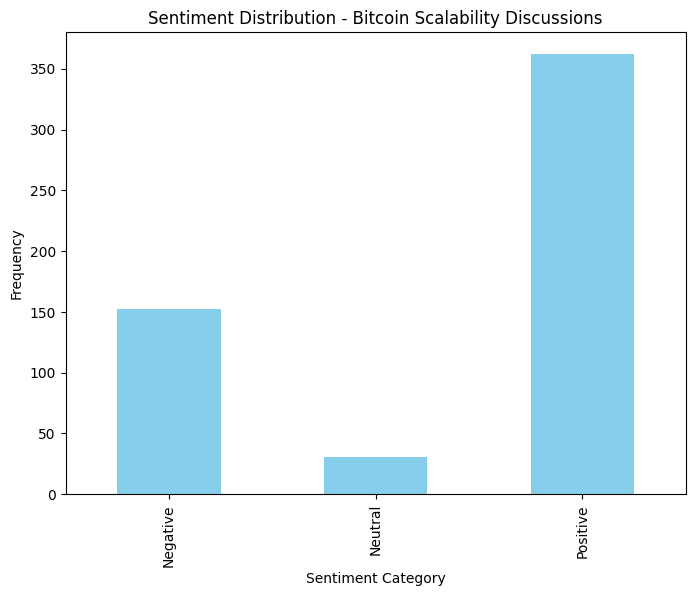

In [ ]:
# Extract sentiment trends within specific topics or keywords
# Example: Analyze sentiment within discussions related to Bitcoin scalability

bitcoin_scalability = df[df['Content'].str.contains('scalability', case=False)]

# Calculate sentiment statistics for Bitcoin scalability discussions
bitcoin_scalability_sentiment_stats = bitcoin_scalability.groupby('Sentiment_Category').size()

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
bitcoin_scalability_sentiment_stats.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution - Bitcoin Scalability Discussions')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.head()

,Post_ID,User,Type,Title,Content,Parent_Post_ID,Sentiment,Sentiment_Category,Timestamp,btc_price
0,1,jonald_fyookball,Comment,bitcoin fit within capitalism style,invest panie risky invest bitcoin bitcoin succ...,1.0,0.3400,Positive,2014-09-17,457.33
1,3,tuskacz,Comment,bitcoin illegal,bitcoin threat fiat currency politician lobby ...,3.0,-0.5106,Negative,2018-01-18,11474.90
2,3,Alphabay.Shop,Comment,bitcoin illegal,countryes goubern bitcoin technology problem b...,3.0,-0.4019,Negative,2018-01-18,11474.90
3,3,usahaali03,Comment,bitcoin illegal,forbid bitcoin operate ban bitcoin medium exch...,3.0,-0.7096,Negative,2018-01-18,11474.90
4,3,crypto90,Comment,bitcoin illegal,moment bitcoin totally legal otherwise pany ac...,3.0,0.7774,Positive,2018-01-18,11474.90
